In [1]:
# preparing the environment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
# read in the file
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Missing Values

In [3]:
# handling missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [4]:
# missing values in percentage
print((missing_values_count/len(df)) * 100)

ID                  0.000000
name                0.001056
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         1.002744
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64


In [7]:
# total missing value in percentage
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print((total_missing/total_cells) * 100, '%')

0.06692001552840139 %


0.067% of values are missing, 0.0011% missing "name", 1% missing "usd pledged"

Let's take a deeper look into the entries with missing values

In [9]:
# on "name"
missing_name = df[df.name.isnull()]
missing_name

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [10]:
# on "usd pledged"
missing_usd_pledged = df[df['usd pledged'].isnull()]
missing_usd_pledged.sample(100)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
358526,896485300,Protecting Cedar Mesa’s Remnants of the Past –...,Film & Video,Film & Video,USD,2014-12-06,7500.0,2014-11-12 00:08:11,8729.00,undefined,0,"N,0""",NaN,8729.00,7500.00
78899,1401451303,Rebecca Lawrence's Solo Project,Music,Music,USD,2015-04-02,2000.0,2015-03-03 21:20:51,1.00,undefined,0,"N,0""",NaN,1.00,2000.00
91475,1464820550,The Love Will Not Be Defeated Tour,Music,Music,USD,2015-05-01,3000.0,2015-04-01 02:57:39,3045.00,undefined,0,"N,0""",NaN,3045.00,3000.00
18136,1092014622,Becoming a Woman Whose God is Enough - Teachin...,Film & Video,Film & Video,USD,2014-09-15,5325.0,2014-08-15 01:11:22,7525.00,undefined,0,"N,0""",NaN,7525.00,5325.00
233099,25481307,Oliveye's music album debut: Come Undone,Music,Music,CAD,2015-03-23,5000.0,2015-02-11 20:33:43,5167.00,undefined,0,"N,0""",NaN,4130.63,3997.12
3825,1019686062,Fairest the Musical Full Cast Concept Album,Music,Music,USD,2015-06-22,4000.0,2015-05-23 06:35:07,0.00,undefined,0,"N,0""",NaN,0.00,4000.00
13754,1069219698,Everyday Experts,Publishing,Publishing,GBP,2015-09-25,1500.0,2015-08-26 19:45:01,0.00,undefined,0,"N,0""",NaN,0.00,2276.49
28652,1145448158,"Orange Stuff ""Here"", album pre-sale",Music,Music,CAD,2014-10-25,4000.0,2014-09-10 15:37:55,4205.00,undefined,0,"N,0""",NaN,3729.82,3547.99
337884,791103538,Saturn's Rings (A Film by Jake Burgess),Film & Video,Film & Video,CAD,2016-04-17,3000.0,2016-03-03 00:04:02,5750.99,undefined,0,"N,0""",NaN,4516.25,2355.90
128804,1653954505,"""Say Hello"" Music Video",Film & Video,Film & Video,USD,2014-10-15,7635.0,2014-09-13 02:13:31,25.00,undefined,0,"N,0""",NaN,25.00,7635.00


Seems like these missing values are actually missing, considering the portion is very small, they will be dropped before visual analysis

In [11]:
# Check for unique values in categorical columns to see if there is anything unusual 
print(df.country.unique())

['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'N,0"' 'SE' 'FR' 'NL'
 'NZ' 'CH' 'AT' 'DK' 'BE' 'HK' 'LU' 'SG' 'JP']


In [15]:
# on "country", there is an odd value - 'N,0"', let's inspect that
# let's first see how many of them are there
len(df[df.country == 'N,0"'])

3797

In [16]:
# this looks familiar
len(df[df['usd pledged'].isnull()])

3797

In [17]:
# it's highly likely that the "NaN" in "usd pledged" co-occur with the 'N,0"' in "country", let's test that
df_this = df[df.country == 'N,0"']
df_that = df[df['usd pledged'].isnull()]
# same ID, same entry
(df_this.ID != df_that.ID).sum()

0

the test confirmed the assumption, so dropping the entries with missing values will also take care of this oddity

In [18]:
# now drop the entries with missing values on 'usd pledged' since abnomarlity co-occur on 'country'
# keep entries with missing values on 'name' since these are actual projects
print(df.shape)
df = df.dropna(subset=['usd pledged'])
print(df.shape)

(378661, 15)
(374864, 15)


# Dates
There appears to be two date columns - "deadline" and "launched", convert them into datetime object if necessary

In [19]:
# deadline
print(df.deadline.head(), '\n')
print(df.launched.head())

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
4    2015-08-29
Name: deadline, dtype: object 

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
4    2015-07-04 08:35:03
Name: launched, dtype: object


In [37]:
# parsing dates
# deadline
parsing_deadline = pd.to_datetime(df.deadline, format="%Y-%m-%d")
print(parsing_deadline.head(), '\n')

# parse into year to see differences across years
df['deadline_year'] = parsing_deadline.dt.year

# parse into month to see seasonal differences
df['deadline_month'] = parsing_deadline.dt.month

# launch_date
parsing_launch = pd.to_datetime(df.launched, format='%Y-%m-%d')
print(parsing_launch.head())

# parse into year to see differences across years
df['launch_year'] = parsing_launch.dt.year

# parse into month to see differences across months
df['launch_month'] = parsing_launch.dt.month

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline, dtype: datetime64[ns] 

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
Name: launched, dtype: datetime64[ns]


347829

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 22 columns):
ID                  374864 non-null int64
name                374860 non-null object
category            374864 non-null object
main_category       374864 non-null object
currency            374864 non-null object
deadline            374864 non-null object
goal                374864 non-null float64
launched            374864 non-null object
pledged             374864 non-null float64
state               374864 non-null object
backers             374864 non-null int64
country             374864 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    374864 non-null float64
usd_goal_real       374864 non-null float64
deadline_parsed     374864 non-null datetime64[ns]
launch_date         374864 non-null datetime64[ns]
launch_time         374864 non-null object
deadline_year       374864 non-null int64
deadline_month      374864 non-null int64
launch_year 

# Visual EDA

### Variables across time

**Counts of projects through years**

In [104]:
# create a data_frame of launch years and counts
launch_yearcount = df[['launch_year', 'ID']].groupby('launch_year').count()
launch_yearcount.columns = ['count']
# create a data_frame of deadline years and counts
deadline_yearcount = df[['deadline_year', 'ID']].groupby('deadline_year').count()
deadline_yearcount.columns = ['count']

print('Count of projects in launch year: ','\n', launch_yearcount)
print('Count of projects in deadline year: ', '\n', deadline_yearcount)

Count of projects in launch year:  
              count
launch_year       
1970             7
2009          1329
2010         10519
2011         26237
2012         41163
2013         44836
2014         66993
2015         74919
2016         56537
2017         52200
2018           124
Count of projects in deadline year:  
                count
deadline_year       
2009             902
2010            9098
2011           25107
2012           41558
2013           44163
2014           65590
2015           75175
2016           57258
2017           52741
2018            3272


<Figure size 432x288 with 0 Axes>

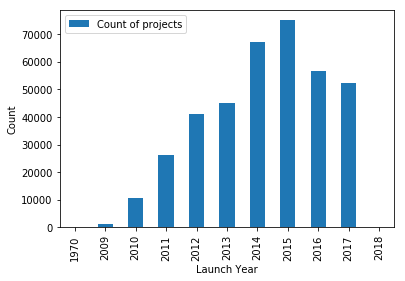

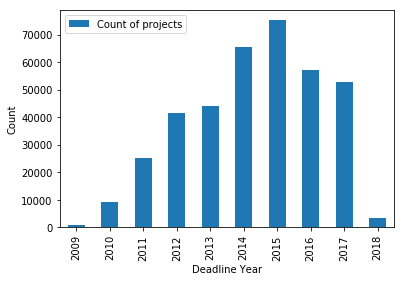

In [167]:
# visualize these in bar plots
# visualize these in bar plots
plt.gcf().clear()

count_launcyear = launch_yearcount.plot(kind='bar')
plt.xlabel('Launch Year')
plt.ylabel('Count')
plt.legend(['Count of projects'], loc='upper left')
plt.show()


count_deadlineyear = deadline_yearcount.plot(kind='bar')
plt.xlabel('Deadline Year')
plt.ylabel('Count')
plt.legend(['Count of projects'], loc='upper left')
plt.show()

As we can see, not many projects were launched or due in 2018 when the data were released

**Success rate across years**

In [142]:
# data frame of success rate across deadline_year - one knows the final 'state' only on and after deadline
success_rate={}

for year in range(2009, 2019):
    successful = len(df[(df.deadline_year==year) & (df.state=='successful')])
    total = len(df[df.deadline_year==year])
    success_rate[year] = successful/total

df_sr = pd.DataFrame.from_dict(success_rate, orient='index', columns=['success_ratio'])
df_sr

,success_ratio
2009,0.425721
2010,0.440536
2011,0.468714
2012,0.434646
2013,0.434413
2014,0.323235
2015,0.280346
2016,0.327168
2017,0.366849
2018,0.026284


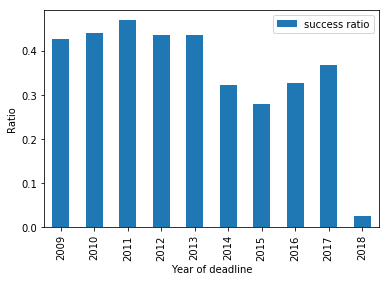

In [166]:
# visualize success rate on a bar plot
df_sr.plot(kind='bar')
plt.xlabel('Year of deadline')
plt.ylabel('Ratio')
plt.legend(['success ratio'], loc = 'upper right')
plt.show()

As we can see, the success ratio for 2018 is in particular low, that is maybe most of the projects are still on-going, let's inspect

In [148]:
df[df.deadline_year==2018]['state'].value_counts()

live          2792
canceled       241
failed         134
successful      86
suspended       19
Name: state, dtype: int64

The assumption was confirmed, most of 2018 projects were still live at the time when the data were released

**backers across years**

since different years have different amount of projects, here the interest-statistics in backers will be average

In [155]:
# data frame for backers across years, 'deadline_year' will be applied since that is when we get the final count of backers
backers_years = df[['deadline_year', 'backers']].groupby('deadline_year').mean()
backers_years.columns = ['avg backers']
backers_years

,avg backers
deadline_year,
2009,32.741685
2010,38.538690
2011,50.411598
2012,102.453896
2013,139.889840
2014,95.836850
2015,99.262720
2016,124.530773
2017,129.335735


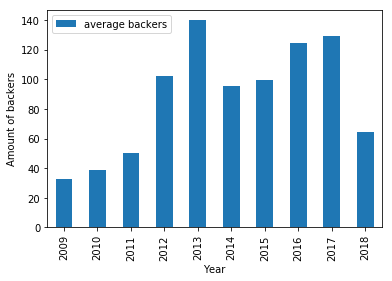

In [168]:
# visualize in bar plot
backers_years.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Amount of backers')
plt.legend(['average backers'], loc='upper left')
plt.show()

the big dip in 2018 might be explained by the time of the data release - all projects are still arracting more backers at the time of data release, therefore the amounts of backers in 2018 were still growing

now let's look at the distribution of the backers across years

In [241]:
df.backers.describe()

count    374864.000000
mean        106.687276
std         911.705321
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

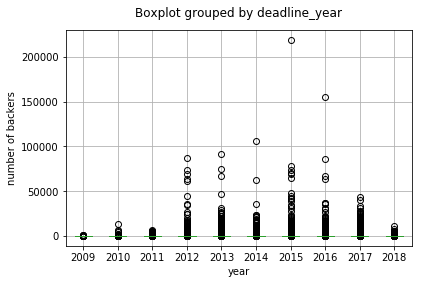

In [183]:
# box plot
df.boxplot('backers', by='deadline_year')
plt.title('')
plt.xlabel('year')
plt.ylabel('number of backers')
plt.show()

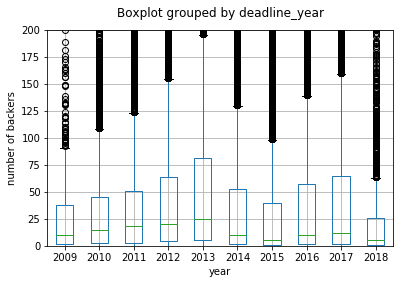

In [223]:
# zoom in
df.boxplot('backers', by='deadline_year')
plt.ylim(0, 200)
plt.title('')
plt.xlabel('year')
plt.ylabel('number of backers')
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


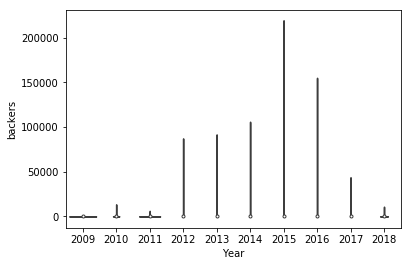

In [199]:
# violin plot
sns.violinplot(x='deadline_year', y='backers', data=df)
plt.xlabel('Year')
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


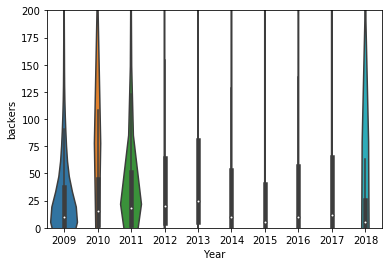

In [201]:
# zoom in
sns.violinplot(x='deadline_year', y='backers', data=df)
plt.xlabel('Year')
plt.ylim(0,200)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


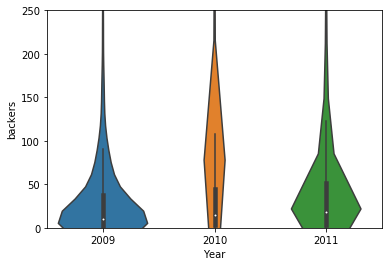

In [218]:
# break into every 3 years
# 2009 - 2011
sns.violinplot(x='deadline_year', y='backers', data=df[df.deadline_year.isin(range(2009, 2012))])
plt.xlabel('Year')
plt.ylim(0,250)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


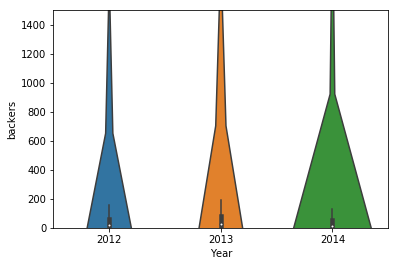

In [224]:
# 2012-2015
sns.violinplot(x='deadline_year', y='backers', data=df[df.deadline_year.isin(range(2012, 2015))])
plt.xlabel('Year')
plt.ylim(0,1500)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


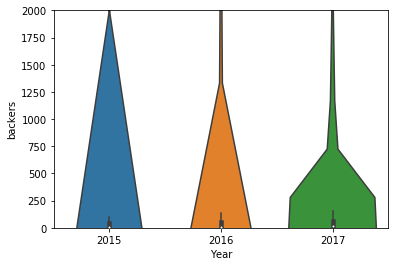

In [229]:
# 2015-2017
sns.violinplot(x='deadline_year', y='backers', data=df[df.deadline_year.isin(range(2015, 2018))])
plt.xlabel('Year')
plt.ylim(0,2000)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


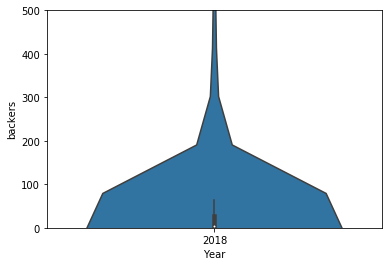

In [231]:
# 2018
sns.violinplot(x='deadline_year', y='backers', data=df[df.deadline_year==2018])
plt.xlabel('Year')
plt.ylim(0,500)
plt.show()

**goals across years**

In [237]:
# data frame for goal across years, mean will be applied, 'deadline_year' will be applied for a goal might varie over time
# and we are interested in the final goal
goal_year = df[['deadline_year', 'usd_goal_real']].groupby('deadline_year').mean()
goal_year.columns=['avg_goal']
goal_year

,avg_goal
deadline_year,
2009,7278.795322
2010,13644.079488
2011,12127.237008
2012,18832.981866
2013,27156.594351
2014,49421.200204
2015,71400.520440
2016,62141.309664
2017,45631.072659


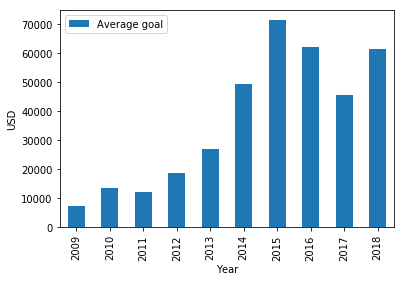

In [169]:
# now visualize this in bar plot
goal_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend(['Average goal'], loc='upper left')
plt.show() 

overall, investment seekers seem to be more ambitious over the past decade

distribution of goal accorss years

In [242]:
df.usd_goal_real.describe()

count    3.748640e+05
mean     4.586318e+04
std      1.158761e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.600000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

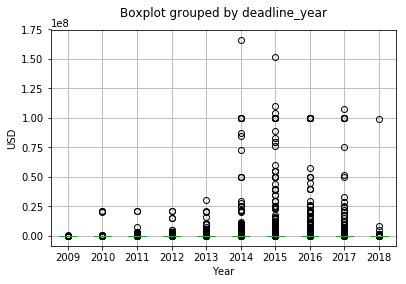

In [243]:
# box plot
df.boxplot('usd_goal_real', by='deadline_year')
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('')
plt.show()

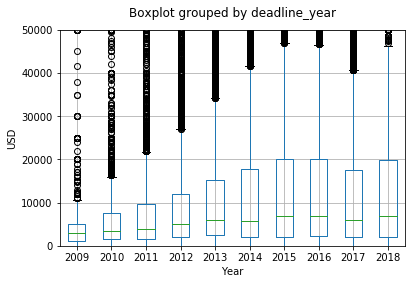

In [244]:
# zoom in
df.boxplot('usd_goal_real', by='deadline_year')
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('')
plt.ylim(0, 50000)
plt.show()

**amount pledged across years**

In [163]:
# data frame for pledge amount, average applied, 'deadline_year' applied for we are interested in final number
pledge_year = df[['deadline_year', 'usd_pledged_real']].groupby('deadline_year').mean()
pledge_year.columns = ['avg_pledge']
pledge_year

,avg_pledge
deadline_year,
2009,2039.453171
2010,2739.511104
2011,3708.008124
2012,7551.775392
2013,10655.045884
2014,7934.870658
2015,9059.134636
2016,11247.388666
2017,12346.961747


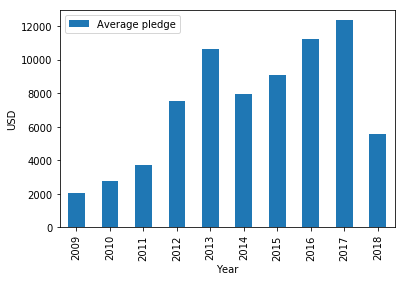

In [172]:
# visualize in bar plot
pledge_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend(['Average pledge'], loc='upper left')
plt.show()

There is a  huge dip in 2018 - the live projects are still attracting investments 

distribution of pledge across years

In [254]:
df.usd_pledged_real.describe()

count    3.748640e+05
mean     9.120803e+03
std      9.131921e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.244100e+02
75%      4.050815e+03
max      2.033899e+07
Name: usd_pledged_real, dtype: float64

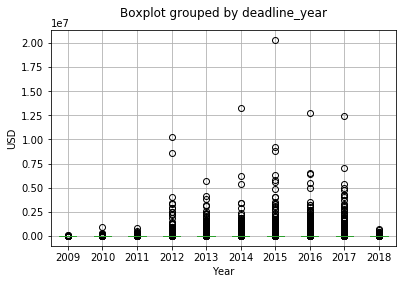

In [258]:
# box plot
df.boxplot('usd_pledged_real', by='deadline_year')
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('')
plt.show()

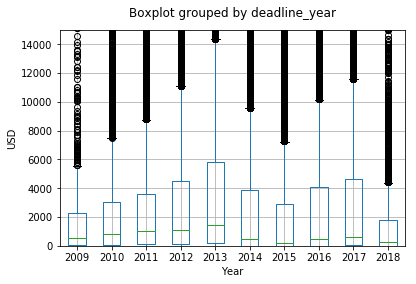

In [260]:
# zoom in
df.boxplot('usd_pledged_real', by='deadline_year')
plt.xlabel('Year')
plt.ylabel('USD')
plt.ylim(0,15000)
plt.title('')
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


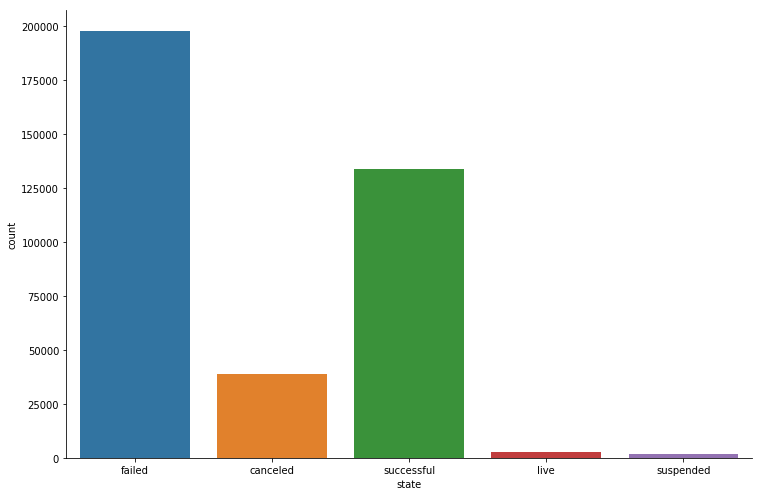

In [261]:
# Let's take a look at the "state" - counts of each level 
sns.catplot(x = 'state', kind = 'count', data = df, size = 7, aspect = 1.5)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


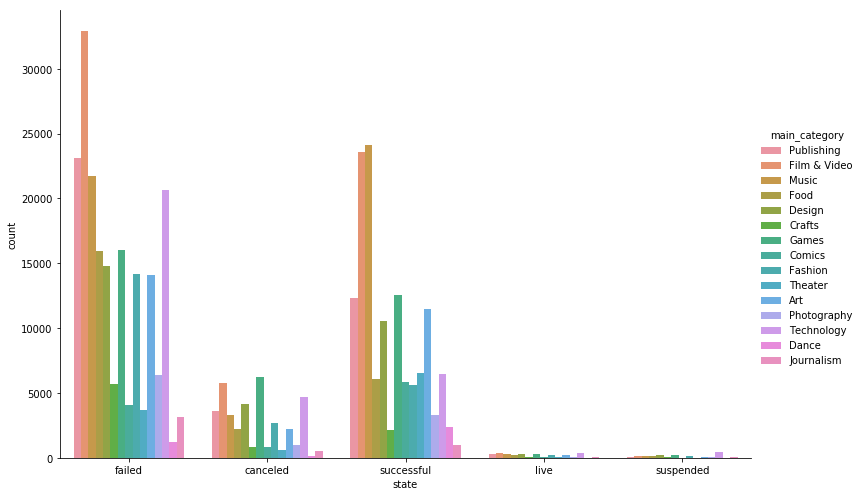

In [262]:
# separate by 'main_category'
sns.catplot(x='state', kind='count', hue='main_category', data=df, size = 7, aspect = 1.5)
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


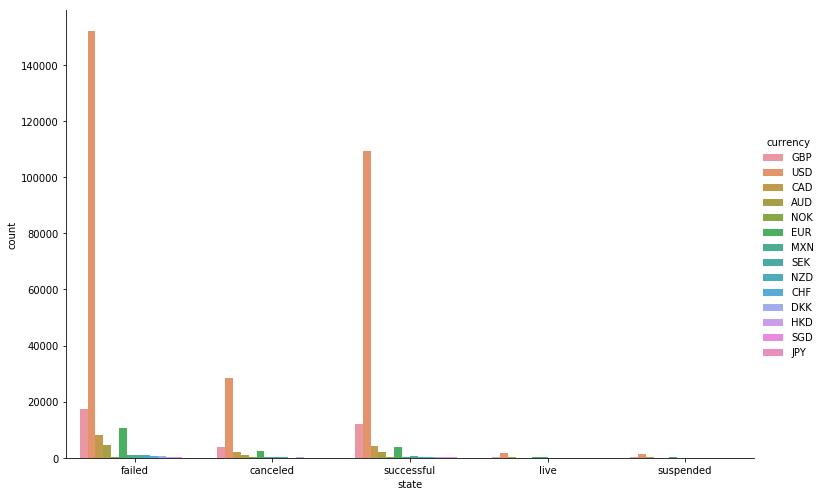

In [264]:
# separate by 'currency'
sns.catplot(x='state', kind='count', hue='currency', data=df, size=7, aspect=1.5)
plt.show()

##### Main Category

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


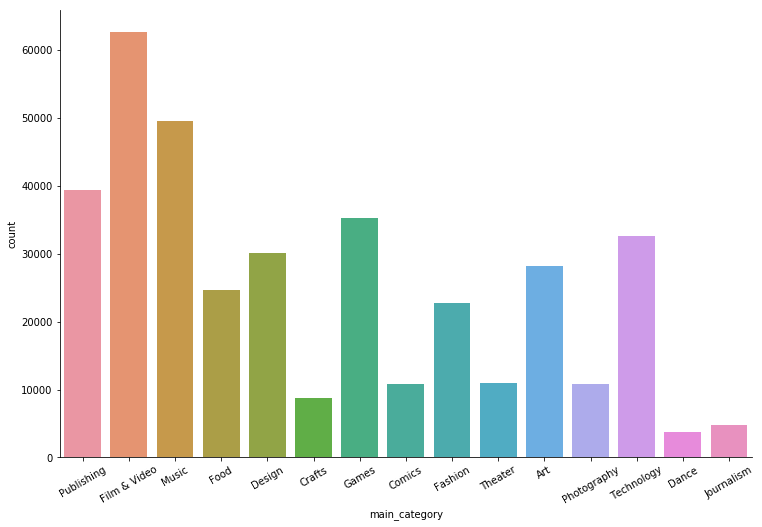

In [263]:
# numbers of projects by in each main category
plot_main_cat = sns.catplot(x='main_category', kind='count', size=7, aspect=1.5, data=df)
plot_main_cat.set_xticklabels(rotation=30)
plt.show()